<a href="https://colab.research.google.com/github/kkimhaji/FlyAI/blob/main/Deep%20Learning/CNN/15_cnn_boundingbox_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 고양이 얼굴 검출 (detection)
---

In [ ]:
!gdown  https://drive.google.com/uc?id=1-RBvPOYycsSpS7rVP0Pqwcbh18lZYDeb

Downloading...
From: https://drive.google.com/uc?id=1-RBvPOYycsSpS7rVP0Pqwcbh18lZYDeb
To: /content/BBRegression.zip
100% 945k/945k [00:00<00:00, 121MB/s]


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
import seaborn as sns

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!unzip BBRegression.zip

Archive:  BBRegression.zip
   creating: BBRegression/
  inflating: BBRegression/README.dataset.txt  
  inflating: BBRegression/README.roboflow.txt  
   creating: BBRegression/test/
  inflating: BBRegression/test/cat-110_jpg.rf.919d96206faca75068ac5595928f4005.jpg  
  inflating: BBRegression/test/cat-110_jpg.rf.919d96206faca75068ac5595928f4005.xml  
  inflating: BBRegression/test/cat-123_jpg.rf.9a0878d7d6e110b302293109a66b43bf.jpg  
  inflating: BBRegression/test/cat-123_jpg.rf.9a0878d7d6e110b302293109a66b43bf.xml  
  inflating: BBRegression/test/cat-143_jpg.rf.61045dbe235b78c5fdf8d2267b0bea85.jpg  
  inflating: BBRegression/test/cat-143_jpg.rf.61045dbe235b78c5fdf8d2267b0bea85.xml  
  inflating: BBRegression/test/cat-144_jpg.rf.50b4b01d0df37d977b1341837708aa1d.jpg  
  inflating: BBRegression/test/cat-144_jpg.rf.50b4b01d0df37d977b1341837708aa1d.xml  
  inflating: BBRegression/test/cat-188_jpg.rf.4bb417309154766edeac39c9c9d083f7.jpg  
  inflating: BBRegression/test/cat-188_jpg.rf.4bb41730

## 데이터 준비


In [ ]:
import glob
import xml.etree.ElementTree as ET

# 함수 가져오기 

def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            bbx = member.find('bndbox')
            xmin = int(bbx.find('xmin').text)
            ymin = int(bbx.find('ymin').text)
            xmax = int(bbx.find('xmax').text)
            ymax = int(bbx.find('ymax').text)
            label = member.find('name').text

            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     label,
                     xmin,
                     ymin,
                     xmax,
                     ymax
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height',
                   'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

In [ ]:
import os

FILE_NAME = 'label_cats.csv'
IMAGE_PATH = 'BBRegression'

csv_path = os.path.join(IMAGE_PATH, 'train')
xml_df = xml_to_csv(csv_path)
xml_df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,cat-1_jpg.rf.e1ca630a3abd03f83076277c31a91630.jpg,224,224,cat,36,26,162,165
1,cat-11_jpg.rf.94d3e122bc61f6430e09de2e27ace0e9...,224,224,cat,92,4,202,110
2,cat-193_jpg.rf.0011b0901f709dad9f2017f2a3a3c1a...,224,224,cat,30,15,205,156
3,cat-227_jpg.rf.b0e39e49b4f074a8b151a2d130a1390...,224,224,cat,34,11,142,120
4,cat-28_jpg.rf.27a874e0fa79267b8311563cde71394a...,224,224,cat,59,28,215,178
...,...,...,...,...,...,...,...,...
86,cat-277_jpg.rf.c893921373db4c849d48ae80d96c929...,224,224,cat,61,27,158,90
87,cat-176_jpg.rf.f8ab98bc22bdead2a46b4e7dbb30d8a...,224,224,cat,15,12,207,173
88,cat-12_jpg.rf.bfc2a9bc1a04c12ee608bb6f221971d6...,224,224,cat,58,19,132,111
89,cat-213_jpg.rf.c90c1de1c83bb937993dd56305328c5...,224,224,cat,46,2,195,134


In [ ]:
xml_df.to_csv(FILE_NAME)

In [ ]:
images = xml_df.iloc[:, 0].values
images[:5]

array(['cat-1_jpg.rf.e1ca630a3abd03f83076277c31a91630.jpg',
       'cat-11_jpg.rf.94d3e122bc61f6430e09de2e27ace0e9.jpg',
       'cat-193_jpg.rf.0011b0901f709dad9f2017f2a3a3c1a7.jpg',
       'cat-227_jpg.rf.b0e39e49b4f074a8b151a2d130a13903.jpg',
       'cat-28_jpg.rf.27a874e0fa79267b8311563cde71394a.jpg'], dtype=object)

In [ ]:
points = xml_df.iloc[:,4:].values
points[:4]

array([[ 36,  26, 162, 165],
       [ 92,   4, 202, 110],
       [ 30,  15, 205, 156],
       [ 34,  11, 142, 120]])

## 시각화

In [ ]:
import PIL

dataset_images = []
dataset_bbx = []

for file, point in zip(images, points):
  f = os.path.join(IMAGE_PATH, 'train', file)
  image = PIL.Image.open(f)
  arr = np.array(image)
  dataset_images.append(arr)
  dataset_bbx.append(point)

dataset_images = np.array(dataset_images)
dataset_bbx = np.array(dataset_bbx)

In [ ]:
print(dataset_images.shape, dataset_bbx.shape)

(91, 224, 224, 3) (91, 4)


이제까진 데이터가 1차원이었는데 바운딩 박스 포인트는 4개

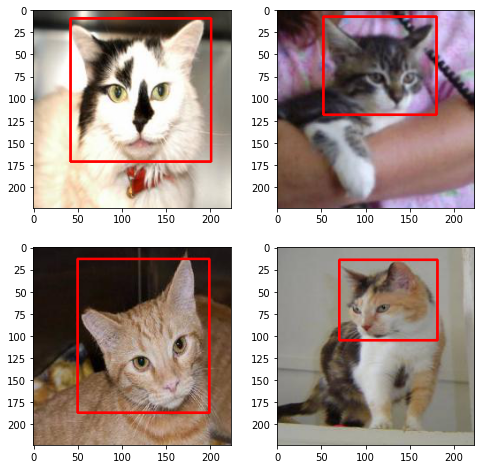

In [ ]:
import cv2

samples = np.random.randint(91, size=4)

plt.figure(figsize=(8,8))
for i, idx in enumerate(samples):
  points = dataset_bbx[idx].reshape(2, 2)

  img = cv2.rectangle(dataset_images[idx].copy(),
                      tuple(points[0]), tuple(points[1]),
                      color = [255,0,0],
                      thickness=2)
  
  plt.subplot(2, 2, i+1)

  plt.imshow(img)


plt.show()

In [ ]:
np.savez('cat_bbs.npz',
         image=dataset_images,
         bbs=dataset_bbx)
# 파일로 저장 

In [ ]:
dataset = np.load('cat_bbs.npz')

X = dataset['image']
y = dataset['bbs']

X.shape, y.shape

((91, 224, 224, 3), (91, 4))

## 검증 데이터

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_val.shape

((72, 224, 224, 3), (19, 224, 224, 3))

## 정규화

In [ ]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255

In [ ]:
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

y_train.dtype

dtype('float32')

회귀를 풀면 정수가 아니라 소수점이 있는 실수 타입으로 나오기 때문에 형변환을 해줘야 함 

## 모델

In [ ]:
# 데이터가 많이 없으므로 전이학습 

from tensorflow.keras.applications import MobileNetV2

base = MobileNetV2(input_shape=(224,224,3),
                   include_top = False,
                  #  weigths = 'imagenet' #이건 원래 디폴트인데 그냥 적어둠
                   )

base.trainable = False

model = keras.Sequential([
    base,
    layers.Flatten(),
    layers.Dense(units = 128, activation = 'relu'),
    layers.Dense(units = 64, activation='relu'),
    layers.Dense(units = 4) # 점 4개를 찾아야 하므로 units 출력은 4개, activation은 없음(regression이므로)
])

model.compile(
    optimizer = 'adam',
    loss = 'mse', #회귀에서는 mse - 분류는 crossentropy
    metrics=['mse']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               8028288   
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 4)                 260       
                                                                 
Total params: 10,294,788
Trainable params: 8,036,804
Non-trainable params: 2,257,984
___________________________________

In [ ]:
ckpt_path = './ckpt/cats_bbs.ckpt'

ckpt_cb = tf.keras.callbacks.ModelCheckpoint(
    ckpt_path,
    save_weights_only = True,
    save_best_only = True,
    monitor  = 'val_loss',
    verbose=1
)


In [ ]:
EPOCHS = 30
BATCH_SIZE = 16 #데이터가 너무 적음

log = model.fit(
    X_train, y_train,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = (X_val, y_val),
    callbacks=[ckpt_cb],
    verbose=1
)

Epoch 1/30
5/5 [==============================] - ETA: 0s - loss: 6519.2095 - mse: 6519.2095
Epoch 1: val_loss improved from inf to 5830.11670, saving model to ./ckpt/cats_bbs.ckpt
5/5 [==============================] - 8s 1s/step - loss: 6519.2095 - mse: 6519.2095 - val_loss: 5830.1167 - val_mse: 5830.1167
Epoch 2/30
5/5 [==============================] - ETA: 0s - loss: 2408.5518 - mse: 2408.5518
Epoch 2: val_loss improved from 5830.11670 to 1717.36206, saving model to ./ckpt/cats_bbs.ckpt
5/5 [==============================] - 4s 758ms/step - loss: 2408.5518 - mse: 2408.5518 - val_loss: 1717.3621 - val_mse: 1717.3621
Epoch 3/30
5/5 [==============================] - ETA: 0s - loss: 1082.1541 - mse: 1082.1541
Epoch 3: val_loss improved from 1717.36206 to 1497.62854, saving model to ./ckpt/cats_bbs.ckpt
5/5 [==============================] - 4s 784ms/step - loss: 1082.1541 - mse: 1082.1541 - val_loss: 1497.6285 - val_mse: 1497.6285
Epoch 4/30
5/5 [==============================] - ETA

In [ ]:
# 학습 곡선
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.plot(hist['epoch'], hist['mse'],label='Train MSE')
    plt.plot(hist['epoch'], hist['val_mse'],label = 'Val MSE')

    plt.legend()
    plt.show()

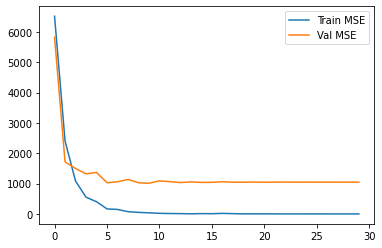

In [ ]:
plot_history(log)

In [ ]:
#베스트 모델 읽어오기
model.load_weights(ckpt_path)

## 모델 저장 

In [ ]:
#1. keras형태로 저장
model.save('cats_bbs_regression.h5') 
#h5: 모델에 있는 레이어, 구조, weigths 전체를 한꺼번에 저장

In [ ]:
my_model = tf.keras.models.load_model('cats_bbs_regression.h5')
my_model.summary(0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               8028288   
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 4)                 260       
                                                                 
Total params: 10,294,788
Trainable params: 8,036,804
Non-trainable params: 2,257,984
___________________________________

In [ ]:
#2. tensorflow로 
model.save('my_cats_model')

In [ ]:
your_model = tf.keras.models.load_model('my_cats_model')

In [ ]:
# y_pred = your_model.predict(X_test)

---

## 테스트
- 테스트 이미지 로딩
- 예측

In [ ]:
# 이미지 로딩하기 (xml)
# X_test = ./content/BBRegression/test
# y_pred = model.predict(X_test)
# y_pred를 int 타입으로 변경 astype()
# 이미지, y_pred 를 시각화



In [ ]:
X_test = []
y_test = []
fnames = glob.glob('BBRegression/test' + '/*.jpg')
# fnames = os.listdir(os.path.join(IMAGE_PATH, 'test'))
for f in fnames:
  image = PIL.Image.open(f)
  arr = np.array(image)
  X_test.append(arr)

X_test = np.array(X_test)

In [ ]:
X_test = X_test.astype('float32')/255
y_pred = model.predict(X_test).astype('int')
y_pred

1/1 [==============================] - 0s 367ms/step


array([[ 53,  26, 183, 174],
       [ 61,  18, 193, 168],
       [ 49,  16, 175, 157],
       [ 69,   9, 175, 119],
       [ 43,   8, 129,  98],
       [ 36,  16, 165, 157],
       [ 38,  12, 158, 118],
       [ 41,  13, 169, 158],
       [ 56,  12, 150, 117],
       [ 49,   6, 171, 132],
       [ 79,  21, 216, 181]])

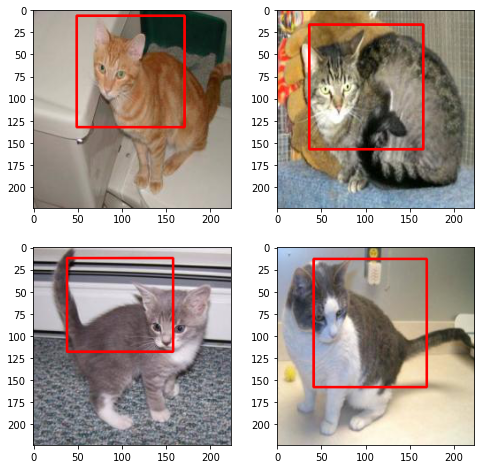

In [ ]:
samples = np.random.randint(11, size=4)

plt.figure(figsize=(8,8))

for i, idx in enumerate(samples):
  points = y_pred[idx].reshape(2, 2)

  img = cv2.rectangle(dataset_images[idx].copy(),
                      tuple(points[0]), tuple(points[1]),
                      color = [255,0,0],
                      thickness=2)
  
  plt.subplot(2, 2, i+1)

  plt.imshow(img)


plt.show()